<ipython-input-3-a0127c786308>:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=scatter.cmap(i / 2), label=target_name)


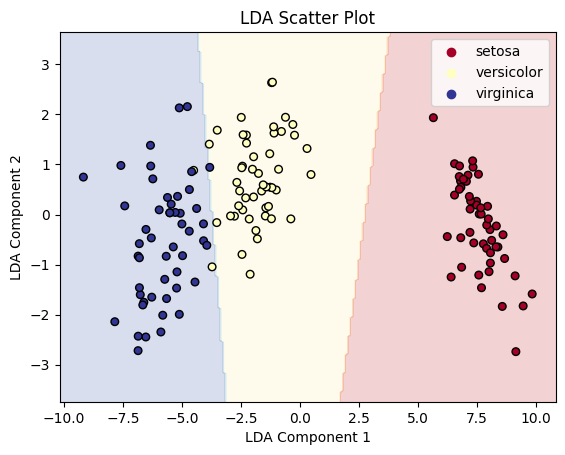

<ipython-input-3-a0127c786308>:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=scatter.cmap(i / 2), label=target_name)


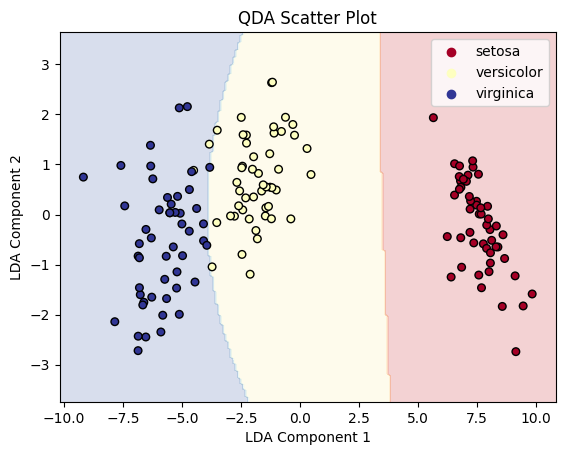

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split

# Load the iris dataset
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

# Reduce dimensionality for visualization (using LDA projection)
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_r2, y, test_size=0.3, random_state=42)

# Plot function to visualize LDA and QDA results
def plot_decision_boundary(model, X, y, title):
    #x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    #y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    # Predict on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and scatter points
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.RdYlBu)
    #scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=30, cmap=plt.cm.RdYlBu)

    # Manually create legend
    for i, target_name in enumerate(target_names):
        plt.scatter([], [], c=scatter.cmap(i / 2), label=target_name)
    plt.legend()

    plt.title(title)
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    plt.show()

# LDA scatter plot
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
plot_decision_boundary(lda_model, X_r2, y, title="LDA Scatter Plot")

# QDA scatter plot
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
plot_decision_boundary(qda_model, X_r2, y, title="QDA Scatter Plot")


I have learnt discriminant function and its types from this experiment

1. **Types of discriminant functions**: Linear Discriminant Analysis (LDA), Quadratic Discriminant Analysis (QDA), Regularized Discriminant Analysis (RDA).  
2. **Purpose of discriminant function**: To classify data points by finding a boundary that separates different classes based on feature values.  
3. **Advantage of SVM**: SVM is effective for high-dimensional data, finds the optimal boundary with a maximum margin, and works well in non-linear settings using kernels.  
4. **Define LDA**: LDA is a statistical method that projects data onto a lower-dimensional space by maximizing the separation between classes using a linear boundary.  
5. **Define QDA**: QDA is a variant of discriminant analysis that models each class with its own covariance matrix, allowing for a non-linear decision boundary.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train decision tree with pruning and max depth limitation
tree = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01, max_depth=3)  # Added max_depth
tree.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


1. **Concept of prune classification**: Prune classification involves removing branches from a decision tree to simplify the model and improve generalization.  
2. **Importance of prune classification**: It enhances model performance on unseen data by reducing overfitting and increasing interpretability.  
3. **How pruning helps to prevent overfitting in classification trees**: Pruning removes unnecessary complexity from the model, thereby decreasing the likelihood of fitting noise in the training data.  
4. **Examples of pruning algorithms**: Cost complexity pruning (CCP), reduced error pruning, and minimum description length pruning.  
5. **Pruning metrics used to determine when to prune a tree**: Cross-validation error, complexity cost (such as `ccp_alpha`), and training/test accuracy rates.

In [ ]:
class CandidateElimination:
    def __init__(self):
        self.S, self.G = [], []

    def fit(self, examples, targets):
        self.S, self.G = [['0'] * len(examples[0])], [['1'] * len(examples[0])]
        for example, target in zip(examples, targets):
            if target == 'Yes':
                self.S = [s for s in self.S if all(s == e or s == '0' for s, e in zip(s, example))]
                #self.G = [g for g in self.G if not all(g == e or g == '1' for g, e in zip(g, example))] + [example]
            else:
                self.G = [g for g in self.G if not all(g == e or g == '1' for g, e in zip(g, example))]
                #self.S = [s for s in self.S if all(s == e or s == '0' for s, e in zip(s, example))]

    def get_hypotheses(self):
        return self.S, self.G

# Example usage

examples = [['Sunny', 'Warm', 'Normal', 'Strong'], ['Sunny', 'Warm', 'High', 'Strong'], ['Rainy', 'Cold', 'High', 'Weak'], ['Sunny', 'Warm', 'High', 'Weak']]
targets = ['Yes', 'Yes', 'No', 'Yes']

ce = CandidateElimination()
ce.fit(examples, targets)
print("Specific Hypothesis (S):", ce.get_hypotheses()[0])
print("General Hypothesis (G):", ce.get_hypotheses()[1])


Specific Hypothesis (S): [['0', '0', '0', '0']]
General Hypothesis (G): [['Sunny', 'Warm', 'Normal', 'Strong'], ['Sunny', 'Warm', 'High', 'Strong'], ['Sunny', 'Warm', 'High', 'Weak']]


1. **Concept of Candidate Elimination Algorithm**: It iteratively refines specific and general hypotheses based on training examples to learn a target concept.  
2. **How CEA handles the concepts of generalization and specification**: CEA maintains specific (most specific) and general (most general) hypotheses, updating them with positive and negative examples.  
3. **Components of datasets used in CEA**: It utilizes instances, attributes, target concepts, and hypotheses as core components.  
4. **How CEA handles inconsistencies in training data**: CEA struggles with inconsistencies, often resulting in vague hypotheses, but can be adjusted to ignore conflicting examples.  
5. **Limitations of CEA in real-time applications**: CEA can be computationally intensive and may not scale well for large or noisy datasets, hindering real-time performance.

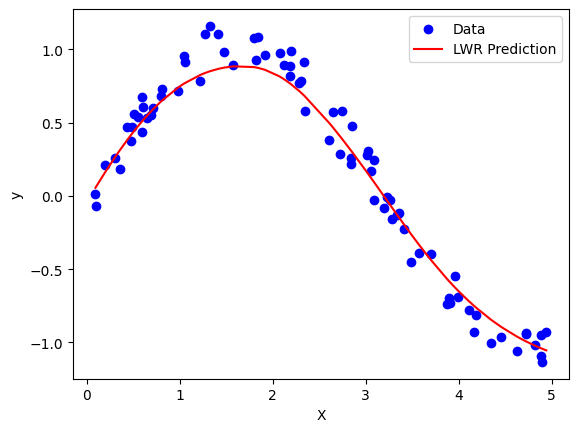

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lwr(X, y, x_q, tau):
    w = np.exp(-((X - x_q)**2) / (2 * tau**2)).flatten()
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    W = np.diag(w)
    theta = np.linalg.pinv(X_b.T @ W @ X_b) @ X_b.T @ W @ y
    x_q_b = np.array([1, x_q[0]])
    return x_q_b @ theta

np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + 0.1 * np.random.randn(80)

tau = 0.5
y_pred = np.array([lwr(X, y, x_q, tau) for x_q in X])

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


1. **Difference**: LWR focuses more on nearby points than traditional regression, which treats all points equally.

2. **Non-parametric**: LWR adapts to data without assuming a fixed model shape.

3. **Advantages**: Good for complex, changing patterns; very flexible.

4. **Steps**: Collect data, choose a kernel, calculate weights, fit locally, predict.

5. **Kernels**: Gaussian, Tricube, Epanechnikov, Rectangular.

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter

def e(y):
    p = np.bincount(y) / len(y)
    return -np.sum([x * np.log2(x) for x in p if x > 0])

def g(X, y, f):
    e_b = e(y)
    v, c = np.unique(X[:, f], return_counts=True)
    e_a = sum((c[i] / sum(c)) * e(y[X[:, f] == v[i]]) for i in range(len(v)))
    return e_b - e_a

def id3(X, y, ftrs):
    if len(set(y)) == 1: return y[0]
    if not ftrs: return Counter(y).most_common(1)[0][0]
    gains = [g(X, y, f) for f in ftrs]
    bf = ftrs[np.argmax(gains)]
    tree = {bf: {}}
    for v in np.unique(X[:, bf]):
        sub_X = X[X[:, bf] == v]
        sub_y = y[X[:, bf] == v]
        tree[bf][v] = id3(sub_X, sub_y, [f for f in ftrs if f != bf])
    return tree

def p(tree, x):
    if not isinstance(tree, dict): return tree
    f = next(iter(tree))
    return p(tree[f][x[f]], x)

data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
X = df.drop(columns=['Play']).apply(lambda c: pd.factorize(c)[0]).values
y = pd.factorize(df['Play'])[0]

ftrs = range(X.shape[1])
tree = id3(X, y, ftrs)
print("Decision Tree:", tree)
print("Prediction:", p(tree, X[0]))


Decision Tree: {0: {0: {2: {0: 0, 1: 1}}, 1: 1, 2: {3: {0: 1, 1: 0}}}}
Prediction: 0


1. **Working principle**: ID3 builds a decision tree by recursively selecting attributes that best separate the data into classes based on information gain.

2. **Attribute selection**: ID3 selects the best attribute to split by calculating the information gain for each attribute and choosing the one that maximizes it.

3. **Tree building process**: Start with the entire dataset, compute information gain for attributes, split the data based on the best attribute, repeat for subsets until stopping criteria are met.

4. **Advantages**: Simple to understand, works well with categorical data, and generates compact trees.

5. **Limitations**: Prone to overfitting, biased toward attributes with many values, and doesn’t handle continuous data without modifications.

Accuracy: 0.95


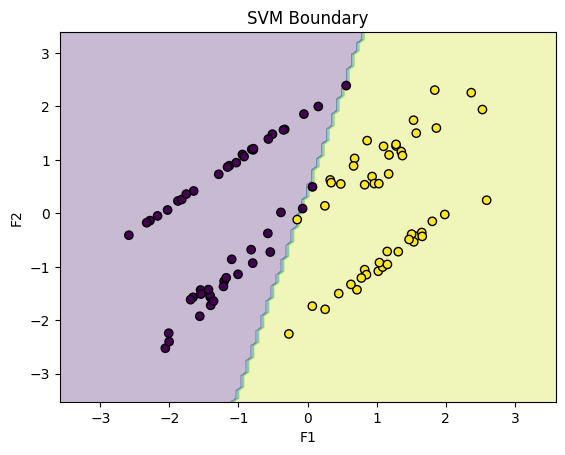

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split

X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

m = svm.SVC(kernel='linear')
m.fit(X_train, y_train)
y_pred = m.predict(X_test)
acc = np.mean(y_pred == y_test)
print("Accuracy:", acc)

def plot_svm(m, X, y):
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                         np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
    Z = m.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('F1')
    plt.ylabel('F2')
    plt.title('SVM Boundary')
    plt.show()

plot_svm(m, X, y)


1. **Basic idea**: Support Vector Machine (SVM) aims to find the best hyperplane that separates data points of different classes with the maximum margin.

2. **Classification**: Yes, SVM is primarily used for classification tasks.

3. **Purpose of margin**: The margin maximizes the distance between the hyperplane and the nearest data points (support vectors) to improve model generalization.

4. **Hyperplane concept**: A hyperplane is a decision boundary that separates different classes in the feature space.

5. **Non-linearly separable data**: Yes, SVM can handle non-linearly separable data using kernel functions to transform the feature space.

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import movie_reviews
import nltk

nltk.download('movie_reviews')

docs = [(list(movie_reviews.words(f)), c) for c in movie_reviews.categories() for f in movie_reviews.fileids(c)]
np.random.shuffle(docs)
X = [' '.join(d) for d, _ in docs]
y = [1 if c == 'pos' else 0 for _, c in docs]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vec = CountVectorizer()
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

model = RandomForestClassifier()
model.fit(X_train_vec, y_train)
acc = np.mean(model.predict(X_test_vec) == y_test)
print("Accuracy:", acc)


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


Accuracy: 0.805


1. **Sentiment analysis**: Determining the emotional tone of text, classifying it as positive, negative, or neutral, using machine learning techniques.

2. **Random forest in sentiment analysis**: Creates multiple decision trees and outputs the most common classification for predictions.

3. **Advantages of random forest**: Robust to overfitting, handles large datasets well, and provides feature importance scores.

4. **Common challenges**: Imbalanced data, high dimensionality, and effective text preprocessing.

5. **Feature selection and engineering**: Improves performance by reducing noise and enhancing important features for better classification.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

d = datasets.load_iris()
X, y = d.data, d.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')

for i in range(len(y_test)):
    status = "Correct" if y_pred[i] == y_test[i] else "Wrong"
    print(f'{status}: Actual: {d.target_names[y_test[i]]}, Predicted: {d.target_names[y_pred[i]]}')


Accuracy: 100.00%
Correct: Actual: versicolor, Predicted: versicolor
Correct: Actual: setosa, Predicted: setosa
Correct: Actual: virginica, Predicted: virginica
Correct: Actual: versicolor, Predicted: versicolor
Correct: Actual: versicolor, Predicted: versicolor
Correct: Actual: setosa, Predicted: setosa
Correct: Actual: versicolor, Predicted: versicolor
Correct: Actual: virginica, Predicted: virginica
Correct: Actual: versicolor, Predicted: versicolor
Correct: Actual: versicolor, Predicted: versicolor
Correct: Actual: virginica, Predicted: virginica
Correct: Actual: setosa, Predicted: setosa
Correct: Actual: setosa, Predicted: setosa
Correct: Actual: setosa, Predicted: setosa
Correct: Actual: setosa, Predicted: setosa
Correct: Actual: versicolor, Predicted: versicolor
Correct: Actual: virginica, Predicted: virginica
Correct: Actual: versicolor, Predicted: versicolor
Correct: Actual: versicolor, Predicted: versicolor
Correct: Actual: virginica, Predicted: virginica
Correct: Actual: set

1. **KNN and how it works**: K-Nearest Neighbors (KNN) classifies data points based on the majority class of their K nearest neighbors in the feature space.

2. **Choosing the value of K**: The value of K is chosen through techniques like cross-validation, considering factors like dataset size and noise.

3. **Different distance metrics**: Common distance metrics in KNN include Euclidean, Manhattan, and Minkowski distances.

4. **Advantages of KNN**: Simple to understand, effective for small datasets, and requires no training phase.

5. **Disadvantages of KNN**: Computationally intensive for large datasets, sensitive to irrelevant features, and struggles with high-dimensional data.

In [1]:
!pip install pgmpy


In [ ]:
import pandas as pd
from pgmpy.models import BayesianNetwork  # Updated class name
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator

# Load the dataset
url = 'https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv'
df = pd.read_csv(url)

# Define the structure of the Bayesian Network
mdl = BayesianNetwork([
    ('age', 'target'), ('sex', 'target'), ('cp', 'target'),
    ('trestbps', 'target'), ('chol', 'target'), ('fbs', 'target'),
    ('restecg', 'target'), ('thalach', 'target'), ('exang', 'target'),
    ('oldpeak', 'target'), ('slope', 'target'), ('ca', 'target'), ('thal', 'target')
])

# Fit the model using the MaximumLikelihoodEstimator
mdl.fit(df, estimator=MaximumLikelihoodEstimator)

# Perform inference
inf = VariableElimination(mdl)

# Perform a query with given evidence
q = inf.query(variables=['target'], evidence={'age': 63, 'sex': 1, 'cp': 3, 'chol': 250})

# Print the result
print(q)


In [ ]:
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator

url = 'https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv'
df = pd.read_csv(url)

mdl = BayesianModel([
    ('age', 'target'), ('sex', 'target'), ('cp', 'target'),
    ('trestbps', 'target'), ('chol', 'target'), ('fbs', 'target'),
    ('restecg', 'target'), ('thalach', 'target'), ('exang', 'target'),
    ('oldpeak', 'target'), ('slope', 'target'), ('ca', 'target'), ('thal', 'target')
])

mdl.fit(df, estimator=MaximumLikelihoodEstimator)
inf = VariableElimination(mdl)

q = inf.query(variables=['target'], evidence={'age': 63, 'sex': 1, 'cp': 3, 'chol': 250})
print(q)


1. **Importance**: Predicting heart disease with ML helps in early diagnosis, potentially reducing healthcare costs and improving patient outcomes.

2. **Common ML algorithms**: Logistic regression, Decision Trees, Random Forest, SVM, and Neural Networks are frequently used.

3. **Preprocessing heart data**: Key steps include handling missing values, normalizing features, encoding categorical data, and feature selection.

4. **Performance evaluation**: Metrics like accuracy, precision, recall, F1-score, and AUC-ROC are used to assess model performance.

5. **Limitations**: Challenges include data imbalance, interpretability, potential overfitting, and the need for high-quality data.

In [ ]:
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator

url = 'https://raw.githubusercontent.com/snigdhasambitak/Chronic_Kidney_Disease_Dataset/main/kidneyChronic.csv'
df = pd.read_csv(url)

mdl = BayesianModel([
    ('age', 'classification'), ('bp', 'classification'), ('sg', 'classification'),
    ('al', 'classification'), ('su', 'classification'), ('rbc', 'classification'),
    ('pc', 'classification'), ('pcc', 'classification'), ('ba', 'classification'),
    ('bgr', 'classification'), ('bu', 'classification'), ('sc', 'classification'),
    ('sod', 'classification'), ('pot', 'classification'), ('hemo', 'classification'),
    ('pcv', 'classification'), ('wc', 'classification'), ('rc', 'classification')
])

mdl.fit(df, estimator=MaximumLikelihoodEstimator)
inf = VariableElimination(mdl)

q = inf.query(variables=['classification'], evidence={'age': 60, 'bp': 80, 'bgr': 120, 'sc': 1.2})
print(q)


1. **Concept**: Kidney disease prediction in ML aims to identify patients at risk by analyzing patterns in medical data.

2. **Common ML algorithms**: Logistic Regression, Random Forest, SVM, Decision Trees, and Neural Networks.

3. **Preprocessing**: Steps include handling missing values, normalizing/standardizing features, encoding categorical data, and feature selection.

4. **Key features**: Blood pressure, glucose levels, creatinine, age, and eGFR are crucial indicators.

5. **Performance evaluation**: Metrics include accuracy, precision, recall, F1-score, and AUC-ROC to assess model effectiveness.